<a href="https://colab.research.google.com/github/LeslyJaramillo/INTELIGENCIA-ARTIFICIAL/blob/main/TARE_1_GAUSSIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Gaussian Process Regression (GPR)
Un Gaussian Process define una distribución sobre funciones $f(x)$. Dados los datos de entrenamiento $X = {x_1, x_2, ..., x_N}$ y las etiquetas correspondientes $y = {y_1, y_2, ..., y_N}$, el modelo asume:

 $$y = f(X) + \epsilon$$

donde $\epsilon \sim N(0, \sigma^2 I)$ es ruido gaussiano independiente.

El prior sobre las funciones $f(x)$ es:
 $f(x) \sim GP(0, k(x, x'))$
donde $k(x, x')$ es el kernel que mide la similitud entre los puntos $x$ y $x'$.

El posterior sobre las funciones dada la evidencia $(X, y)$ está dado por:
$$f_* \mid X, y, X_* \sim N(f_*, K_* - K(X_*, X)K(X, X)^{-1}K(X, X_*))$$

Donde:

$K(X, X)$ es la matriz de covarianza del kernel sobre los puntos de entrenamiento.
$K(X_*, X)$ es la covarianza entre puntos de prueba y puntos de entrenamiento.

**Optimización:**
Se optimizan los hiperparámetros del kernel maximizando la verosimilitud marginal:

$$\log p(y \mid X) = -\frac{1}{2} y^\top K(X, X)^{-1} y - \frac{1}{2} \log \vert K(X, X) \vert - \frac{N}{2} \log 2\pi$$



# 2. Gaussian Process Classification (GPC)
En GPC, se modela la probabilidad de pertenencia a una clase como:

$$p(y = 1 \mid f(x)) = \sigma(f(x))$$

donde $\sigma(\cdot)$ es una función sigmoide como la función logística o priori.

El proceso gaussiano sigue el mismo prior descrito por:

$$f(x) \sim GP(0, k(x, x'))$$
donde $k(x, x')$ es el kernel que mide la similitud entre los puntos $x$ y $x'$.

**Optimización:**

Dado que la verosimilitud no es gaussiana (porque estamos haciendo clasificación), la probabilidad marginal no tiene forma cerrada. Por ello, se utiliza aproximación, como la aproximación de Laplace o la variational inference para aproximar la posterior:

$$p(f \mid X, y) \approx N(f; \mu, \Sigma)$$
 Luego, se maximiza la probabilidad marginal usando la función de costo aproximada.

# 3. Variational Gaussian Processes (VGP)
El modelo VGP introduce aproximaciones variacionales para hacer más eficiente la inferencia en procesos gaussianos. En este caso, en lugar de tratar de calcular directamente la distribución posterior, se aproxima mediante un variational posterior $q(f)$.
Se define un procesos gaussiano para modelar la distribución sobre funciones:
$$f(x) \sim GP(0, k(x, x'))$$

El objetivo es maximizar una cota inferior variacional (ELBO) para aproximar la posterior $p(f \mid X, y)$. Para una función de costo variacional, la Evidencia Lower Bound (ELBO) está dada por:

$$\mathcal{L}_{ELBO} = \int q(f) \log \frac{p(y \mid f)p(f)}{q(f)} df$$

Este ELBO se maximiza con respecto a $q(f)$. En VGP, se modela $q(f)$ usando una distribución gaussiana, generalmente parametrizada en términos de su media $\mu$ y covarianza $sigma$.

Optimización:
La optimización de VGP implica maximizar $\mathcal{L}_{ELBO}$ con respecto a los parámetros variacionales, lo cual se puede hacer utilizando métodos de gradiente:

$$\frac{\partial}{\partial \theta} \mathcal{L}_{ELBO}$$

donde $\theta$ son los hiperparámetros del kernel y los parámetros variacionales de $q(f)$.




# 4. Sparse Gaussian Process Regression (SGPR)
SGPR utiliza un subconjunto reducido de puntos, llamados puntos inducidos $Z$, para aproximar la posterior. En lugar de usar la covarianza completa $K(X, X)$, se utiliza una covarianza reducida basada en $Z$.

La matriz de covarianza del kernel aproximada es:
$$K_{\text{approx}} = K(X, Z) K(Z, Z)^{-1} K(Z, X)$$

donde:

$K(X, Z)$ es la covarianza entre los puntos de entrenamiento $X$ y los puntos inducidos $Z$.
$K(Z, Z)$ es la covarianza entre los puntos inducidos.

**Optimización:**

SGPR maximiza una bound variacional similar a VGP, pero limitada a un número de puntos $M \ll N$. Se optimizan los puntos inducidos $Z$ y los hiperparámetros del kernel.

La bound variacional es:
$$L_{\text{SGPR}} = \log p(y \mid X, Z)$$

donde $Z$ son los puntos inducidos y $X$ son los puntos de entrenamiento.

# 5. Stochastic Variational Gaussian Processes (SVGP)

SVGP es una extensión de SGPR que maneja grandes conjuntos de datos mediante mini-lotes. En lugar de usar todos los datos, SVGP divide el conjunto de datos en mini-lotes de tamaño $B$ para que el cálculo sea más eficiente.

La matriz de covarianza aproximada es la misma que en SGPR:

$$$K_{\text{approx}} = K(X, Z) K(Z, Z)^{-1} K(Z, X)$$

donde:

$K(X, Z)$ es la covarianza entre los puntos de entrenamiento $X$ y los puntos inducidos $Z$.
$K(Z, Z)$ es la covarianza entre los puntos inducidos.

**Optimización:**

SVGP optimiza la evidencia variacional baja (ELBO) sobre mini-lotes de datos. Esto reduce el costo computacional a $O(M^2 B)$, donde $M$ es el número de puntos inducidos y $B$ es el tamaño del mini-lote.

La bound variacional que se maximiza es:

$$L_{\text{SVGP}} = \frac{N}{B} \sum_{i=1}^{B} \log p(y_i \mid f(x_i), Z)$$

donde $B$ es el tamaño del mini-lote y $N$ es el número total de datos.


# 2. Metodos de Optimización
**Optimización con SciPy (BFGS)**

La función objetivo que se optimiza es la log-verosimilitud marginal o la Evidencia Lower Bound (ELBO). El objetivo es minimizar $\mathcal{L}(\theta)$ respecto a los parámetros $\theta$ del modelo.
$$
\theta^* = \text{argmin}_{\theta} \, \mathcal{L}(\theta)
$$
Donde $\mathcal{L}(\theta)$ es la función de log-verosimilitud o ELBO.

**Optimización con TensorFlow (Adam)**

El método de optimización Adam sigue esta regla para actualizar los parámetros:

$$
\theta_{t+1} = \theta_t - \eta \frac{m_t}{\sqrt{v_t} + \epsilon}
$$
$$
\theta_{t+1} = \theta_t - \eta \frac{m_t}{\sqrt{v_t} + \epsilon}
$$

Donde:

$\theta_t$ son los parámetros en el paso $t$.
$\eta$ es la tasa de aprendizaje.
$m_t$ es el promedio móvil del gradiente.
$v_t$ es el promedio móvil del cuadrado del gradiente.
$\epsilon$ es un pequeño valor para evitar divisiones por cero.

**Evidencia Lower Bound (ELBO)** para SVGP
En SVGP, la función de costo que se minimiza es la ELBO sobre mini-lotes de datos:

$$
\mathcal{L}_{\text{ELBO}} = \frac{N}{B} \sum_{i=1}^{B} \log p(y_i \mid f(x_i), Z) - \text{KL}(q(f) || p(f))
$$

Donde:

$N$ es el número total de datos.
$B$ es el tamaño del mini-lote.
$\text{KL}(q(f) || p(f))$ es la divergencia de Kullback-Leibler entre el posterior aproximado $q(f)$ y el prior $p(f)$.



# 3. Clasificador Multiclase

In [4]:
!pip install gpflow tensorflow numpy tensorflow_datasets

In [5]:
import gpflow
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from gpflow.utilities import print_summary
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
# Cargar el dataset Fashion MNIST
(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

In [7]:
def preprocess(dataset):
    images, labels = [], []
    for image, label in dataset:
        images.append(tf.reshape(image, [-1]).numpy() / 255.0)
        labels.append(label.numpy())
    return np.array(images), np.array(labels)

In [8]:
X_train, y_train = preprocess(ds_train)
X_test, y_test = preprocess(ds_test)

In [9]:
# Normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#Puntos inducidos para el GP
num_inducing_points = 100
inducing_points = X_train[:num_inducing_points]

In [11]:
num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train]

In [12]:
# Definir un kernel
kernel = gpflow.kernels.SquaredExponential()

In [13]:
# Crear un modelo de clasificación GP
Z = inducing_points
model = gpflow.models.SVGP(
    kernel=kernel,
    likelihood=gpflow.likelihoods.MultiClass(num_classes),
    inducing_variable=Z,
    num_latent_gps=num_classes,
    q_diag=True)

In [14]:
#optimizador
optimizer = tf.optimizers.Adam(learning_rate=0.01)

In [19]:
@tf.function
def step(X_batch, y_batch):
    with tf.GradientTape() as tape:
        objective = -model.elbo((X_batch, y_batch))
    grads = tape.gradient(objective, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return objective

In [20]:
batch_size = 100
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

In [21]:
#Entrenar el modelo
epochs = 5
for epoch in range(epochs):
    for step_num, (X_batch, y_batch) in enumerate(train_dataset):
        elbo = step(X_batch, y_batch)
    print(f"Epoch {epoch + 1}/{epochs}, ELBO: {elbo.numpy()}")

Epoch 1/5, ELBO: 819.4414786268858
Epoch 2/5, ELBO: 819.4414786272725
Epoch 3/5, ELBO: 819.4414786268806
Epoch 4/5, ELBO: 819.4414786268945
Epoch 5/5, ELBO: 819.4414786269882


In [22]:
f_mean, f_var = model.predict_y(X_test)
y_pred = np.argmax(f_mean, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 10.18%


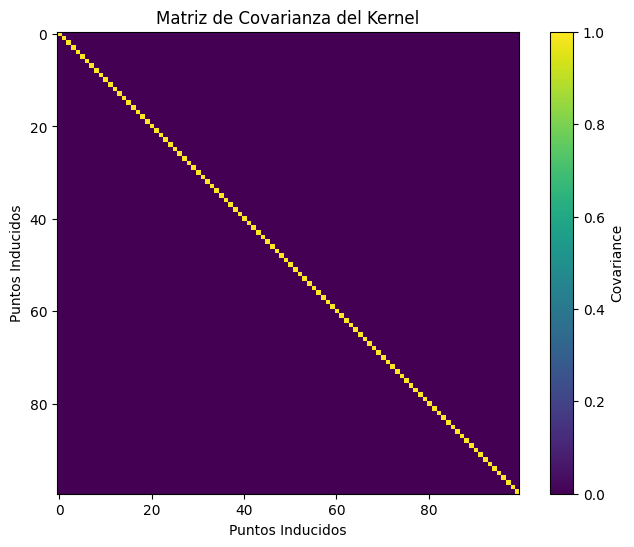

In [25]:
# Graficar el kernel
K = kernel(inducing_points)

plt.figure(figsize=(8, 6))
plt.imshow(K.numpy(), cmap='viridis')
plt.colorbar(label='Covariance')
plt.title('Matriz de Covarianza del Kernel')
plt.xlabel('Puntos Inducidos')
plt.ylabel('Puntos Inducidos')
plt.show()


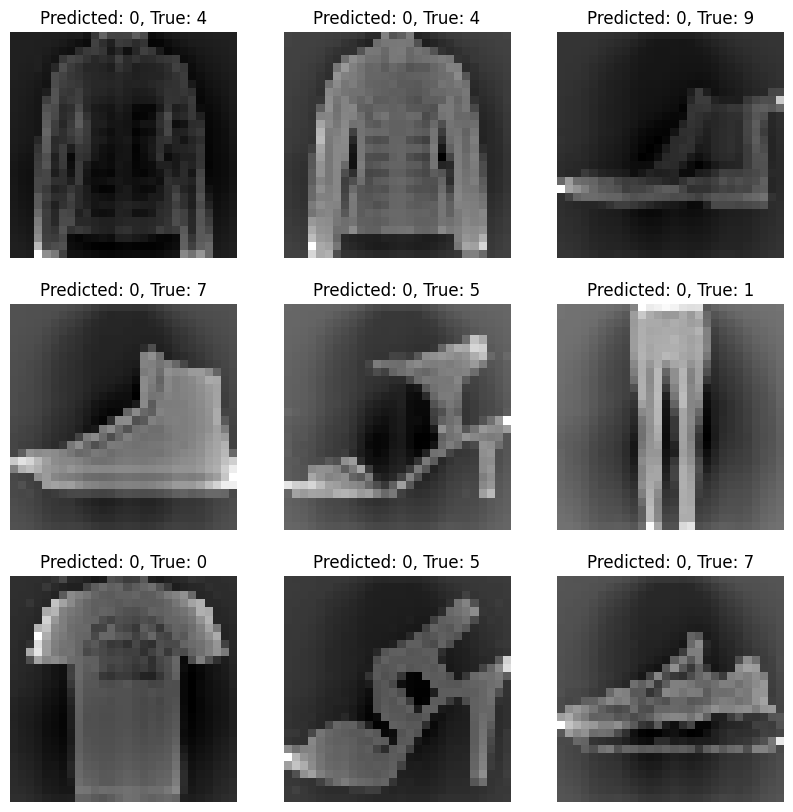

In [23]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}, True: {y_test[i]}')
    plt.axis('off')
plt.show()

# 3. Ventajas y desventajas del VAE y GP

**Ventajas del Autoencoder Variacional (VAE):**


* Los VAE aprenden una representación comprimida de los datos, generando nuevas muestras y capturando la distribución de datos complejos.

* Funcionan bien con grandes volúmenes de datos y múltiples clases.
Generación de datos: Pueden generar ejemplos similares a los datos originales, útiles en tareas creativas o de datos faltantes.

**Desventajas del VAE:**

* Entrenarlos puede ser complicado y difícil de ajustar, especialmente para garantizar buenos resultados en clasificación.
* Difícil entender cómo se toman las decisiones, ya que no es un modelo explícitamente probabilístico en el sentido tradicional.

**Ventajas de Procesos Gaussianos (GP) y GPflow:**

* GP proporciona una medida clara de la incertidumbre en las predicciones, algo crucial en entornos de riesgo.
* Ajusta bien con pocos datos, evitando el sobreajuste.
* Se entiende mejor cómo se toman las decisiones debido a la base probabilística.
Desventajas de GP y GPflow:

*  No manejan bien grandes conjuntos de datos; el costo computacional crece exponencialmente.
* Aunque son potentes, requieren ajustes de kernel complejos para patrones de datos.

En la tarea de clasificación de imágenes con fashion_mnist , el modelo basado en Autoencoder Variacional superó al modelo de Proceso Gaussiano , ya que el autoencoder logró una mejor reconstrucción de las imágenes y, como resultado, una clasificación más precisa. El VAE fue capaz de capturar las características visuales importantes, lo que permitió un mejor rendimiento en esta tarea visual.
